In [12]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('../data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [25]:
# Use label encoding for Country because of high dimensionality (193 unique values)
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

region_column = df['Region']

# Use one-hot encoding for Region because of low dimensionality (6 unique values)
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

y_original = df['Life_expectancy'].values
X = df_encoded.drop(columns='Life_expectancy')
y = df_encoded['Life_expectancy']

df_encoded_with_target = pd.concat([X, y], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_encoded.head()

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Economy_status_Developing,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,164,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,...,1,76.5,False,False,False,True,False,False,False,False
1,148,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,...,0,82.8,False,False,True,False,False,False,False,False
2,74,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,...,1,65.4,True,False,False,False,False,False,False,False
3,69,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,...,1,67.0,False,False,False,False,False,False,False,True
4,79,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,...,0,81.7,False,False,False,True,False,False,False,False


In [15]:
# Check for duplicate rows
duplicate = df_encoded.duplicated()
print("Number of duplicate rows:", duplicate.sum())

Number of duplicate rows: 0


In [16]:
# Check for missing values
nan_values = df_encoded.isna()
nan_values.sum()

Country                                 0
Year                                    0
Infant_deaths                           0
Under_five_deaths                       0
Adult_mortality                         0
Alcohol_consumption                     0
Hepatitis_B                             0
Measles                                 0
BMI                                     0
Polio                                   0
Diphtheria                              0
Incidents_HIV                           0
GDP_per_capita                          0
Population_mln                          0
Thinness_ten_nineteen_years             0
Thinness_five_nine_years                0
Schooling                               0
Economy_status_Developed                0
Economy_status_Developing               0
Life_expectancy                         0
Region_Asia                             0
Region_Central America and Caribbean    0
Region_European Union                   0
Region_Middle East                

In [17]:
# Check for negative values in numerical columns
negative_values = (df_encoded.select_dtypes(include='number') < 0)
negative_values.sum()

Country                        0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [18]:
# Check for values greater than 100 in columns given in percentage
percentage_values = (df_encoded[['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']] > 100)
print("Values greater than 100 in percentage columns:", percentage_values.sum())

Values greater than 100 in percentage columns: Hepatitis_B    0
Measles        0
Polio          0
Diphtheria     0
dtype: int64


In [19]:
# Check for zero values in numerical columns
zero_values = (df_encoded.select_dtypes(include='number') == 0)
print("Zero values in numerical columns:", zero_values.sum())

Zero values in numerical columns: Country                          16
Year                              0
Infant_deaths                     0
Under_five_deaths                 0
Adult_mortality                   0
Alcohol_consumption              38
Hepatitis_B                       0
Measles                           0
BMI                               0
Polio                             0
Diphtheria                        0
Incidents_HIV                     0
GDP_per_capita                    0
Population_mln                    0
Thinness_ten_nineteen_years       0
Thinness_five_nine_years          0
Schooling                         0
Economy_status_Developed       2272
Economy_status_Developing       592
Life_expectancy                   0
dtype: int64


In [20]:
# Check for any rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1
mutual_status_count = df_encoded[(df_encoded['Economy_status_Developed'] == 1) &
                                 (df_encoded['Economy_status_Developing'] == 1)].shape[0]

# Check for rows where both values are 0
neither_status_count = df_encoded[(df_encoded['Economy_status_Developed'] == 0) &
                                  (df_encoded['Economy_status_Developing'] == 0)].shape[0]

print(f"Rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1: {mutual_status_count}")
print(f"Rows where both are 0: {neither_status_count}")

Rows where both 'Economy_status_Developed' and 'Economy_status_Developing' are 1: 0
Rows where both are 0: 0


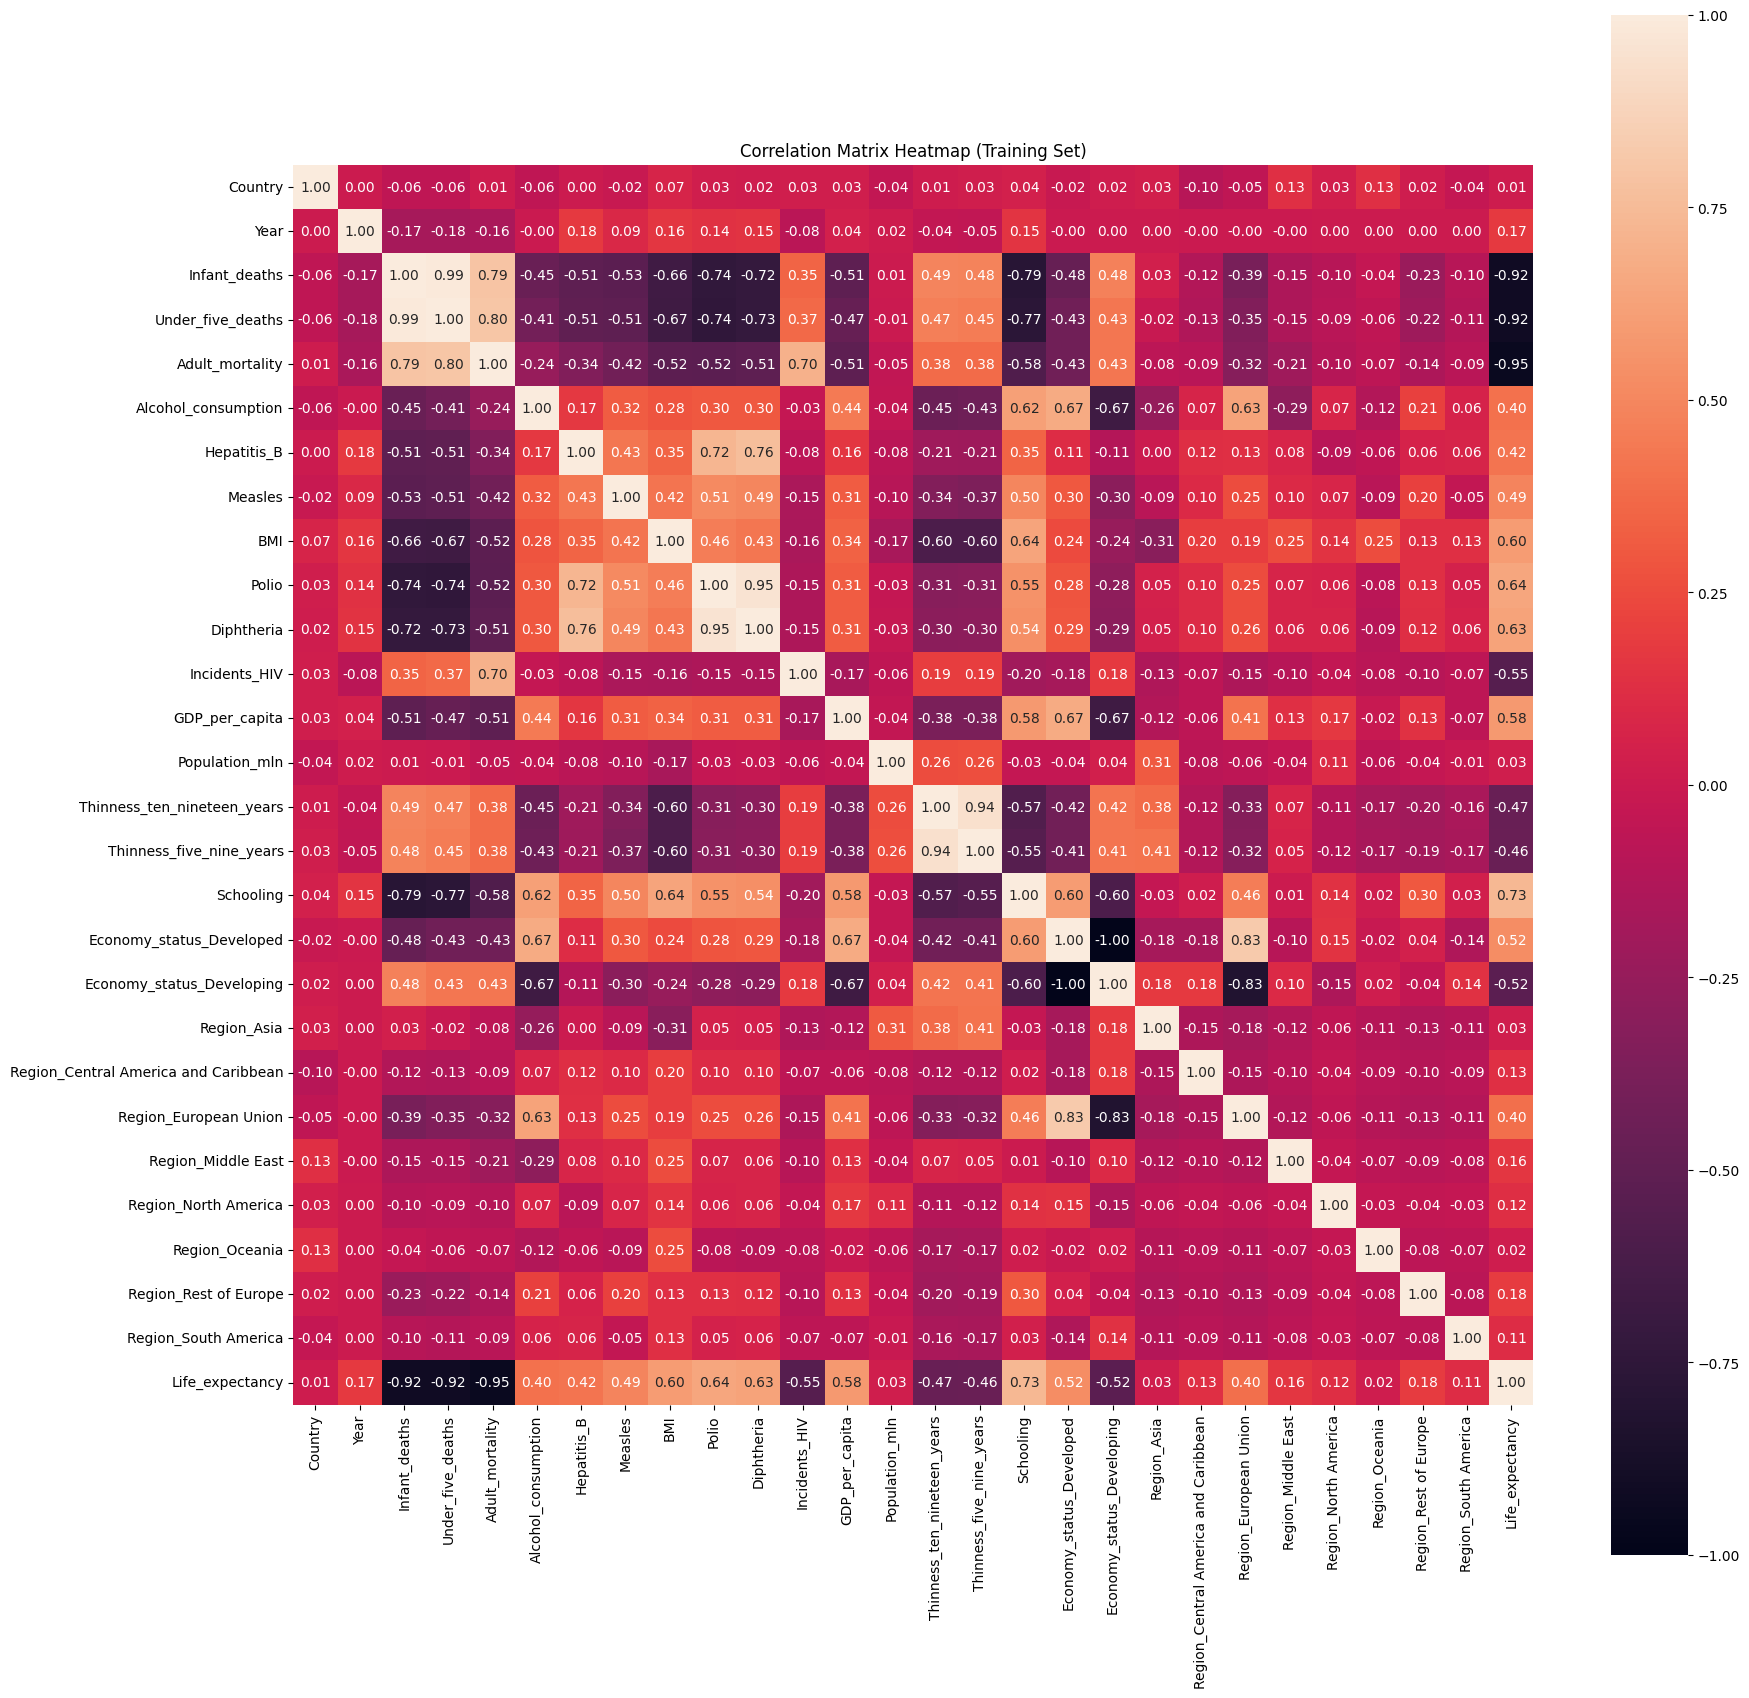

In [24]:
# Create a correlation matrix heatmap
# 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation
correlation_matrix = df_encoded_with_target.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap (Training Set)')
plt.show()

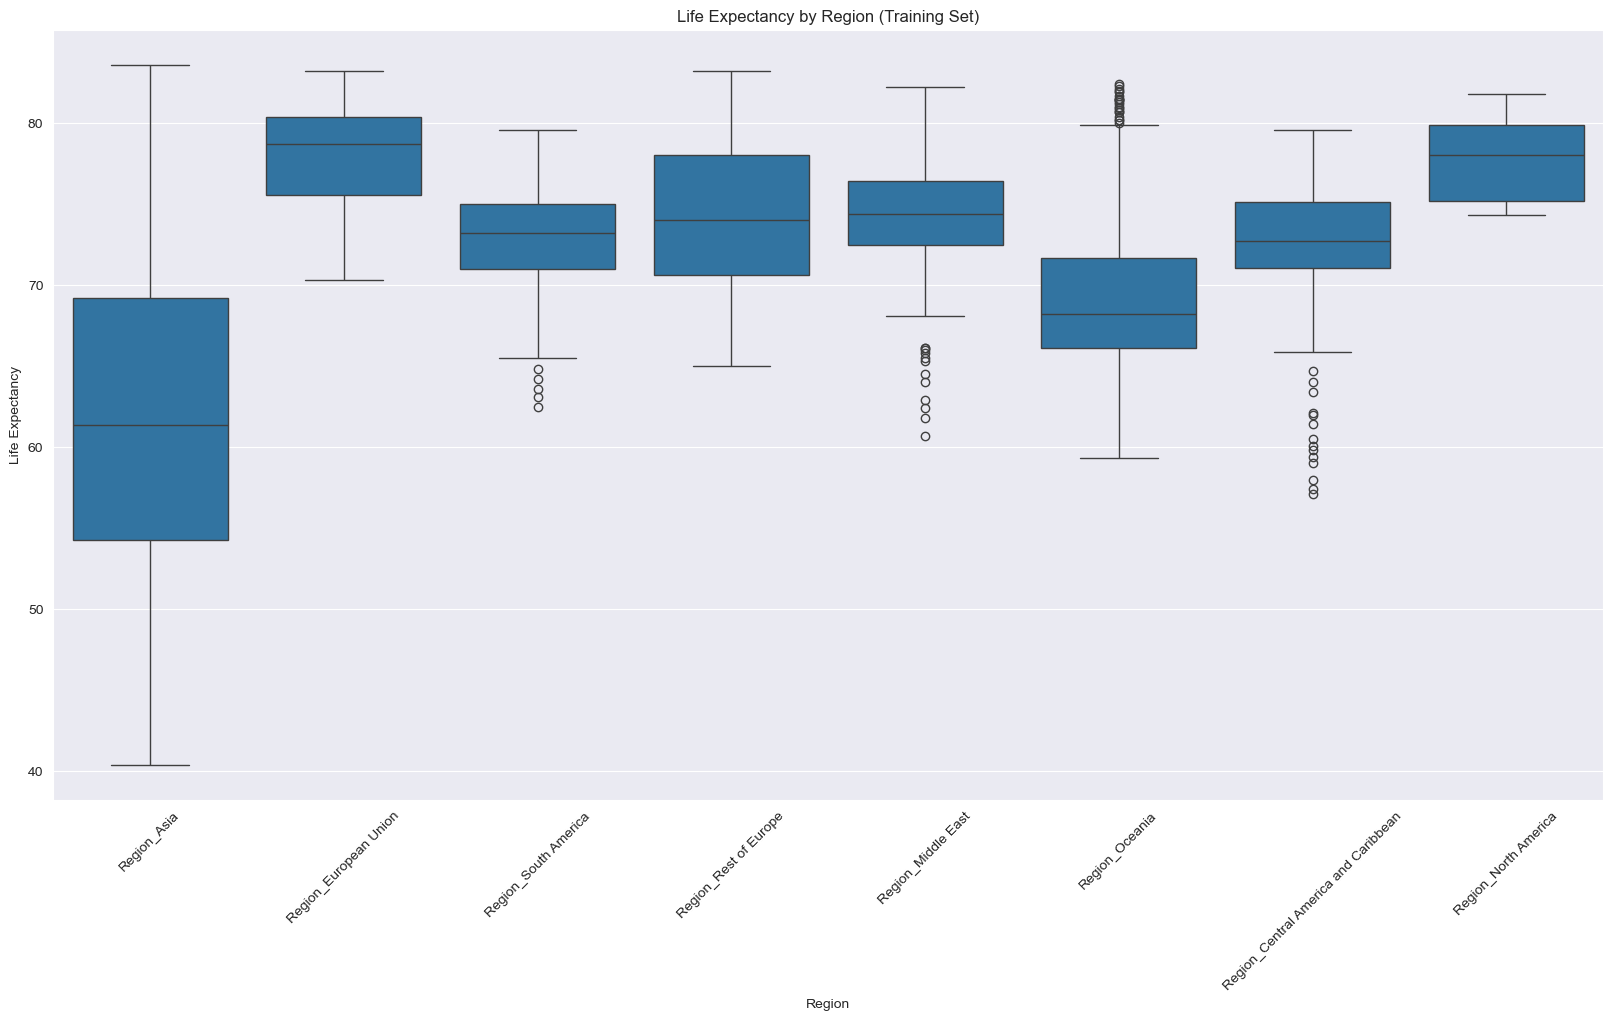

In [11]:
# Box plot of 'Life_expectancy' by 'Region'
region_columns = [col for col in X_train.columns if 'Region_' in col]

plt.figure(figsize=(20, 10))
sns.boxplot(x=X_train[region_columns].idxmax(axis=1), y=y_train)  
plt.title('Life Expectancy by Region (Training Set)')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)
plt.show()

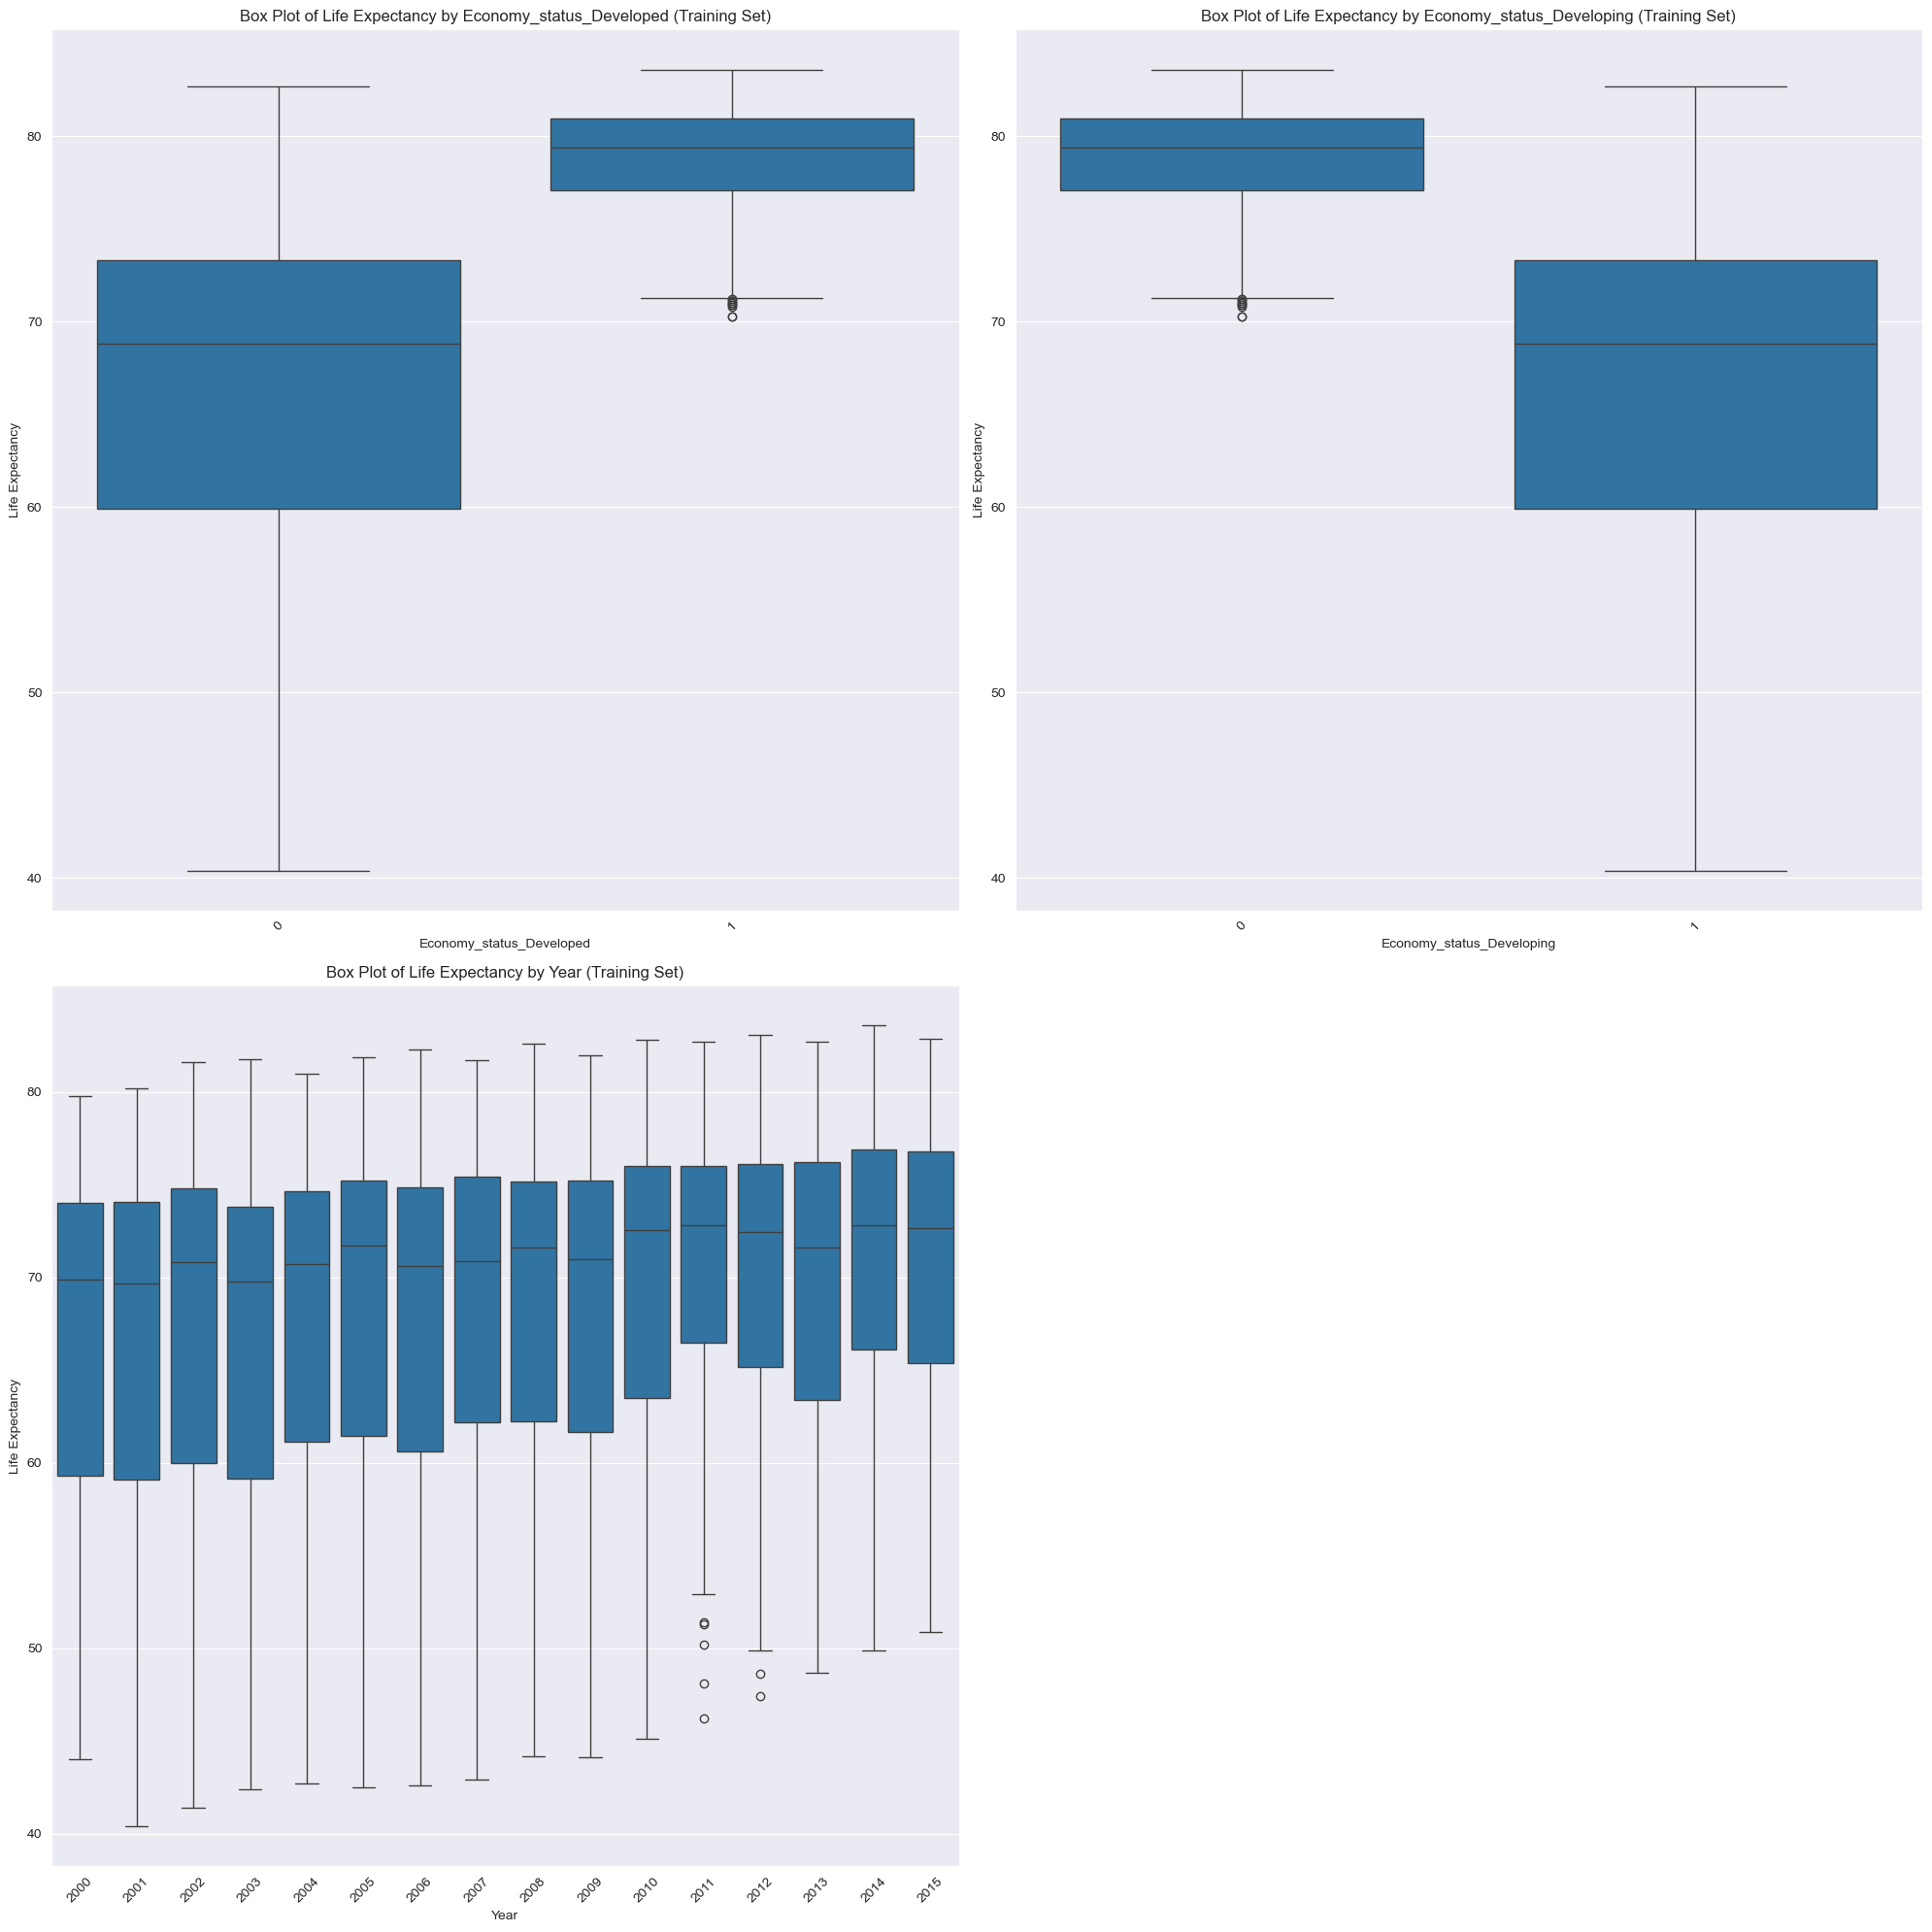

In [12]:
# Box plot of 'Life_expectancy' by 'Economy_status', 'Year', and 'Region'
features = ['Economy_status_Developed', 'Economy_status_Developing', 'Year']

plt.figure(figsize=(20, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=X_train[feature], y=y_train)
    plt.title(f"Box Plot of Life Expectancy by {feature} (Training Set)")
    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

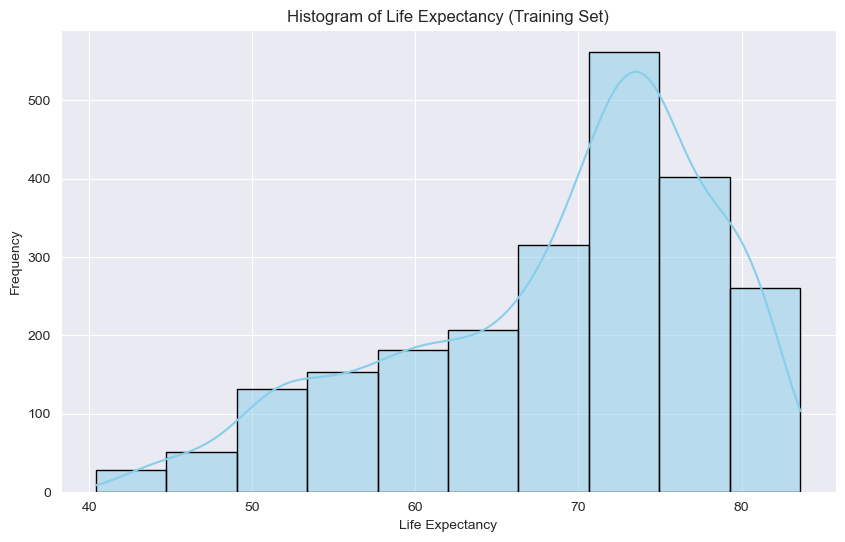

In [13]:
# Plot a histogram for 'Life_expectancy'
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Life Expectancy (Training Set)")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

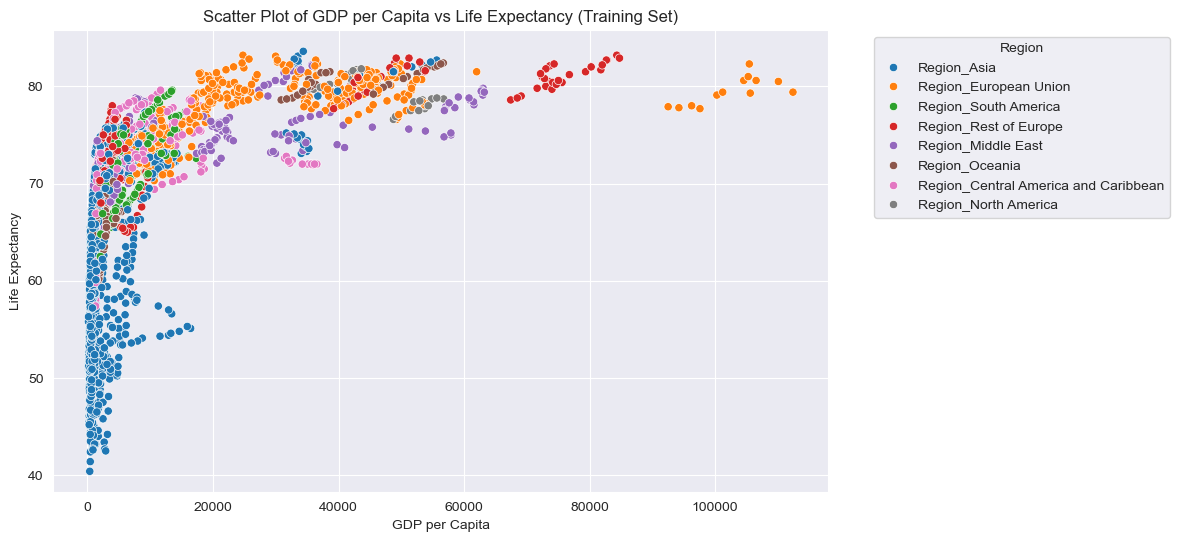

In [14]:
# Scatter plot of 'GDP_per_capita' vs 'Life_expectancy' with hue as 'Region' (using region columns for color)
X_train_with_regions = X_train.copy()
X_train_with_regions['Region'] = X_train_with_regions[region_columns].idxmax(axis=1) 

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_with_regions["GDP_per_capita"], y=y_train, hue=X_train_with_regions["Region"])
plt.title("Scatter Plot of GDP per Capita vs Life Expectancy (Training Set)")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

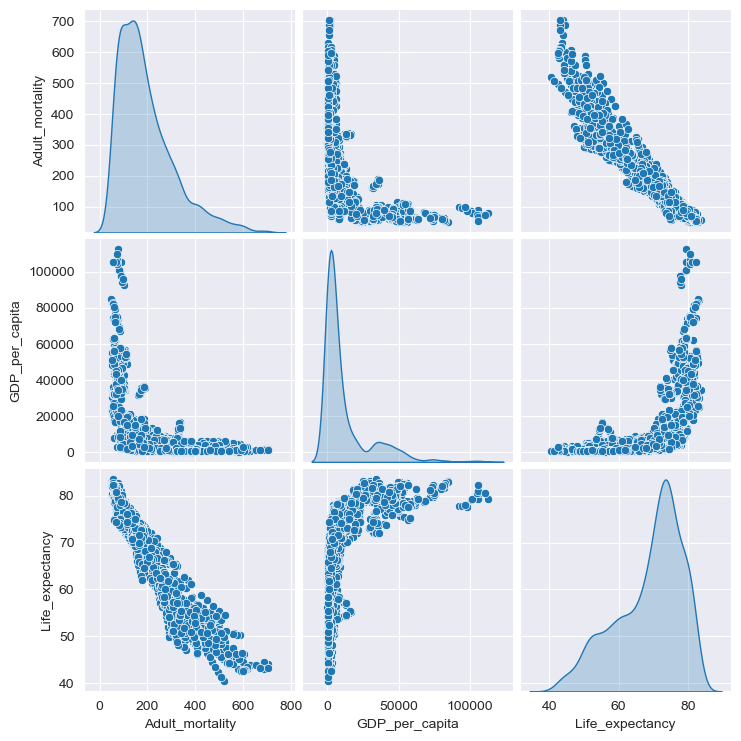

In [15]:
# Create scatter matrix (pairplot) of numerical columns, compared to 'Life_expectancy'
train_data_with_target = X_train[['Adult_mortality', 'GDP_per_capita']].copy()
train_data_with_target['Life_expectancy'] = y_train

sns.pairplot(train_data_with_target, diag_kind='kde', markers='o')
plt.show()

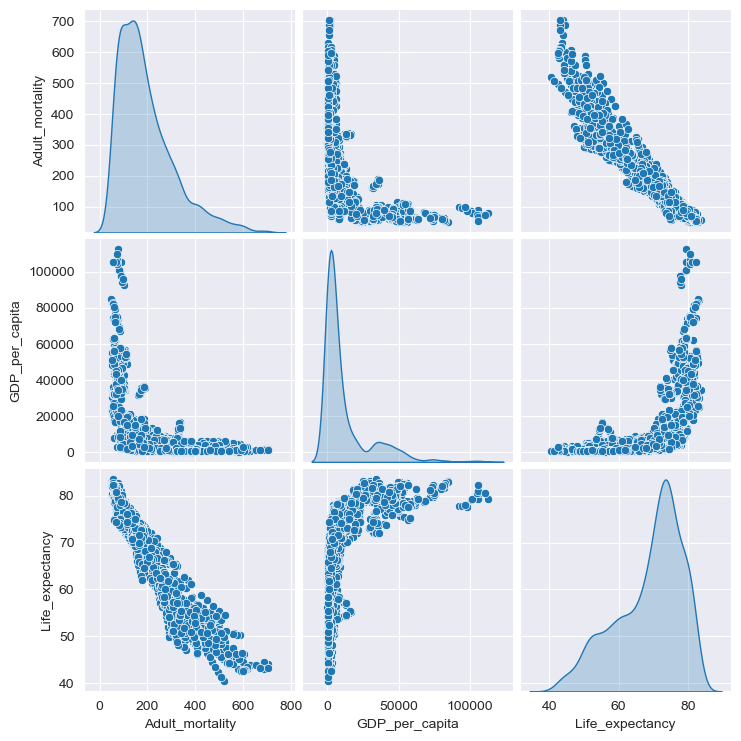

In [16]:
# Create scatter matrix (pairplot) of numerical columns, compared to 'Life_expectancy'
train_data_with_target = X_train[['Adult_mortality', 'GDP_per_capita']].copy()
train_data_with_target['Life_expectancy'] = y_train

sns.pairplot(train_data_with_target, diag_kind='kde', markers='o')
plt.show()

In [17]:
# SelectKBest with f_regression as scoring function, as this is the most suitable since Life_expectancy is a continuous variable
skb = SelectKBest(f_regression, k=5)
skb.fit(X_train, y_train)
X_train_selected = skb.transform(X_train)
X_test_selected = skb.transform(X_test)

selected_features = X_train.columns[skb.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Polio',
       'Schooling'],
      dtype='object')


In [18]:
# Add 'Life_expectancy' back to X_train temporarily to calculate correlation with target
train_data_with_target = X_train.copy()
train_data_with_target['Life_expectancy'] = y_train

# Calculate the correlation matrix with 'Life_expectancy' only in the training set
correlation = train_data_with_target.corr()['Life_expectancy'].sort_values(ascending=False)
print(correlation)

Life_expectancy                         1.000000
Schooling                               0.738005
Polio                                   0.644941
Diphtheria                              0.630160
BMI                                     0.606774
GDP_per_capita                          0.589713
Economy_status_Developed                0.530339
Measles                                 0.494134
Hepatitis_B                             0.425157
Alcohol_consumption                     0.407688
Region_European Union                   0.402637
Region_Rest of Europe                   0.182490
Year                                    0.171909
Region_Middle East                      0.160912
Region_Central America and Caribbean    0.131913
Region_North America                    0.129303
Region_South America                    0.114470
Region_Oceania                          0.029098
Population_mln                          0.026736
Region_Asia                             0.020608
Country             

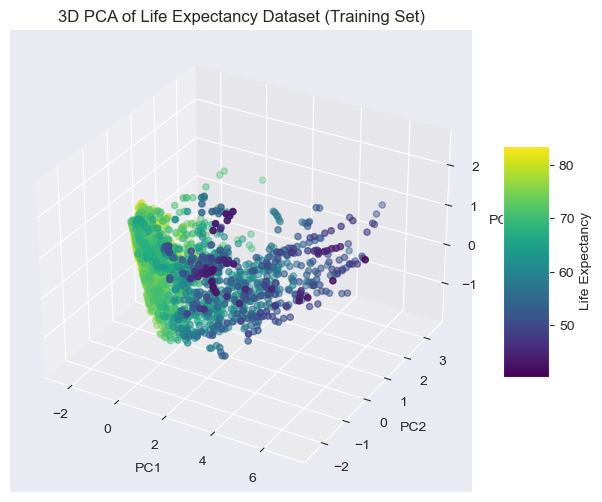

Explained variance ratio for each component: [0.7913495  0.09577561 0.08180543]
Cumulative explained variance: [0.7913495  0.88712511 0.96893054]
                        PC1       PC2       PC3
Infant_deaths      0.491806 -0.033690  0.005642
Under_five_deaths  0.491212 -0.030850  0.049220
Adult_mortality    0.422019 -0.523221  0.568827
Polio             -0.402668 -0.828755 -0.174174
Schooling         -0.420233  0.193180  0.802275


In [19]:
# Perform PCA to reduce the number of variables while keeping the most important information

# Standardize features using only the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])  # Use only selected features from X_train
X_test_scaled = scaler.transform(X_test[selected_features])  # Transform X_test using the same scaler

# Apply PCA to the standardized training data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3D PCA plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')

ax.set_title("3D PCA of Life Expectancy Dataset (Training Set)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
colorbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Life Expectancy')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance_ratio)

# Cumulative variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance:", cumulative_variance)

# Loadings (contributions of features to components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=selected_features)
print(loadings)